<a href="https://colab.research.google.com/github/surbhi28/hamoye_projects/blob/main/Stage_C_project_Webscraped_Top_100_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary required libraries.
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import random
from time import sleep

# Extract attributes to 7 lists
movie_name = []
movie_years = []
movie_runtime = []
movie_genre = []
imdb_ratings = []
metascores = []
number_votes = []
us_gross = []


pages = np.arange(1,100, 50)
headers = {'Accept-Language': 'en-US,en;q=0.8'}

for page in pages:
# Grab the top 100, sort the result by title.
  imdb_url = "https://www.imdb.com/search/title/?groups=top_100&" + "start=" + str(page) + "&ref_=adv_prv"

# Save all values to the results objects coming back from the .get on IMDb URL.
  response = requests.get(imdb_url , headers = headers)

  sleep(random.randint(8,15))

# Parse the results object to movie_soup using the html parser.
  movie_soup = BeautifulSoup(response.content, "html.parser")

  print(response)

# Creating movie_div object to find all div tags in movie_soup.
  movie_div = movie_soup.find_all('div', class_='lister-item-content')

# Loop through each object in the movie_div.
  for container in movie_div:

# Add each result from each attribute for each list.

        # name
        name = container.h3.a.text
        movie_name.append(name)

        # year
        year = container.h3.find('span', class_='lister-item-year').text
        movie_years.append(year)

        # runtime
        runtime = container.p.find('span', class_='runtime').text if container.p.find('span', class_='runtime').text else '-'
        movie_runtime.append(runtime)

        #genre
        genre = container.p.find('span', class_='genre').text
        movie_genre.append(genre)

        # IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)

        # metascore
        m_score = container.find('span', class_='metascore').text if container.find('span', class_='metascore') else '-'
        metascores.append(m_score)

        # There are two NV containers, grab both of them as they hold both the votes and the grosses
        nv = container.find_all('span', attrs={'name': 'nv'})

        # filter nv for votes
        vote = nv[0].text
        number_votes.append(vote)

        # filter nv for gross
        grosses = nv[1].text if len(nv) > 1 else '-'
        us_gross.append(grosses)


<Response [200]>
<Response [200]>


In [ ]:
# Step 10: Build and store all of the attributes into the Pandas movie dataframe.
movies = pd.DataFrame({
'movie_name': movie_name,
'release_year': movie_years,
'movie_duration': movie_runtime,
'movie_genre': movie_genre,
'imdb_ratings': imdb_ratings,
'metascore': metascores,
'number_votes': number_votes,
'us_gross_millions': us_gross,
})

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_name         100 non-null    object 
 1   release_year       100 non-null    object 
 2   movie_duration     100 non-null    object 
 3   movie_genre        100 non-null    object 
 4   imdb_ratings       100 non-null    float64
 5   metascore          100 non-null    object 
 6   number_votes       100 non-null    object 
 7   us_gross_millions  100 non-null    object 
dtypes: float64(1), object(7)
memory usage: 6.4+ KB


In [ ]:
movies.shape

(100, 8)

In [ ]:
movies.head(50)

,movie_name,release_year,movie_duration,movie_genre,imdb_ratings,metascore,number_votes,us_gross_millions
0,Spider-Man: Across the Spider-Verse,(2023),140 min,"\nAnimation, Action, Adventure",8.9,86,"165,930",#12
1,Indiana Jones and the Raiders of the Lost Ark,(1981),115 min,"\nAction, Adventure",8.4,85,"996,858",$248.16M
2,Spider-Man: Into the Spider-Verse,(2018),117 min,"\nAnimation, Action, Adventure",8.4,87,"601,426",$190.24M
3,Pulp Fiction,(1994),154 min,"\nCrime, Drama",8.9,95,"2,118,983",$107.93M
4,Interstellar,(2014),169 min,"\nAdventure, Drama, Sci-Fi",8.7,74,"1,927,974",$188.02M
5,The Shawshank Redemption,(1994),142 min,\nDrama,9.3,82,"2,759,966",$28.34M
6,The Godfather,(1972),175 min,"\nCrime, Drama",9.2,100,"1,920,638",$134.97M
7,The Dark Knight,(2008),152 min,"\nAction, Crime, Drama",9.0,84,"2,732,965",$534.86M
8,Inception,(2010),148 min,"\nAction, Adventure, Sci-Fi",8.8,74,"2,425,295",$292.58M
9,Avengers: Endgame,(2019),181 min,"\nAction, Adventure, Drama",8.4,78,"1,189,891",$858.37M


In [ ]:
# Using str.extract to get only numbers, and save the value as type int.
movies['release_year'] = movies['release_year'].str.extract('(\d+)').astype(int)
movies['movie_duration'] = movies['movie_duration'].str.extract('(\d+)').astype(int)
movies['metascore'] = movies['metascore'].str.replace('-', '0').astype(int)
movies['movie_genre'] = movies['movie_genre'].str.lstrip('\n')
movies['number_votes'] = movies['number_votes'].str.replace(',', '').astype(int)
movies['us_gross_millions'] = movies['us_gross_millions'].map(lambda x: x.lstrip('$').rstrip('M'))
movies['us_gross_millions'] = pd.to_numeric(movies['us_gross_millions'], errors='coerce')

In [ ]:
movies.head(100)

,movie_name,release_year,movie_duration,movie_genre,imdb_ratings,metascore,number_votes,us_gross_millions
0,Spider-Man: Across the Spider-Verse,2023,140,"Animation, Action, Adventure",8.9,86,165930,NaN
1,Indiana Jones and the Raiders of the Lost Ark,1981,115,"Action, Adventure",8.4,85,996858,248.16
2,Spider-Man: Into the Spider-Verse,2018,117,"Animation, Action, Adventure",8.4,87,601426,190.24
3,Pulp Fiction,1994,154,"Crime, Drama",8.9,95,2118983,107.93
4,Interstellar,2014,169,"Adventure, Drama, Sci-Fi",8.7,74,1927974,188.02
...,...,...,...,...,...,...,...,...
95,Witness for the Prosecution,1957,116,"Crime, Drama, Mystery",8.4,76,130225,8.18
96,The Great Dictator,1940,125,"Comedy, Drama, War",8.4,0,229534,0.29
97,High and Low,1963,143,"Crime, Drama, Mystery",8.4,90,48263,NaN
98,Modern Times,1936,87,"Comedy, Drama, Romance",8.5,96,249398,0.16


In [ ]:
# Export dataframe to csv file.
movies.to_csv('top_100_popular_movies.csv')

In [ ]:
import pandas as pd

dataset = pd.read_csv("/content/top_100_popular_movies.csv")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         100 non-null    int64  
 1   movie_name         100 non-null    object 
 2   release_year       100 non-null    int64  
 3   movie_duration     100 non-null    int64  
 4   movie_genre        100 non-null    object 
 5   imdb_ratings       100 non-null    float64
 6   metascore          100 non-null    int64  
 7   number_votes       100 non-null    int64  
 8   us_gross_millions  92 non-null     float64
dtypes: float64(2), int64(5), object(2)
memory usage: 7.2+ KB


In [ ]:
dataset.head()

,Unnamed: 0,movie_name,release_year,movie_duration,movie_genre,imdb_ratings,metascore,number_votes,us_gross_millions
0,0,Spider-Man: Across the Spider-Verse,2023,140,"Animation, Action, Adventure",8.9,86,165930,NaN
1,1,Indiana Jones and the Raiders of the Lost Ark,1981,115,"Action, Adventure",8.4,85,996858,248.16
2,2,Spider-Man: Into the Spider-Verse,2018,117,"Animation, Action, Adventure",8.4,87,601426,190.24
3,3,Pulp Fiction,1994,154,"Crime, Drama",8.9,95,2118983,107.93
4,4,Interstellar,2014,169,"Adventure, Drama, Sci-Fi",8.7,74,1927974,188.02


In [ ]:
dataset.drop(columns = 'Unnamed: 0',axis= 1 , inplace = True)

In [ ]:
dataset.columns

Index(['movie_name', 'release_year', 'movie_duration', 'movie_genre',
       'imdb_ratings', 'metascore', 'number_votes', 'us_gross_millions'],
      dtype='object')

In [ ]:
dataset.head()

,movie_name,release_year,movie_duration,movie_genre,imdb_ratings,metascore,number_votes,us_gross_millions
0,Spider-Man: Across the Spider-Verse,2023,140,"Animation, Action, Adventure",8.9,86,165930,NaN
1,Indiana Jones and the Raiders of the Lost Ark,1981,115,"Action, Adventure",8.4,85,996858,248.16
2,Spider-Man: Into the Spider-Verse,2018,117,"Animation, Action, Adventure",8.4,87,601426,190.24
3,Pulp Fiction,1994,154,"Crime, Drama",8.9,95,2118983,107.93
4,Interstellar,2014,169,"Adventure, Drama, Sci-Fi",8.7,74,1927974,188.02


In [ ]:
dataset['imdb_ratings'].value_counts()

8.4    27
8.5    21
8.3    20
8.6    12
8.8     6
8.7     5
9.0     5
8.9     2
9.3     1
9.2     1
Name: imdb_ratings, dtype: int64

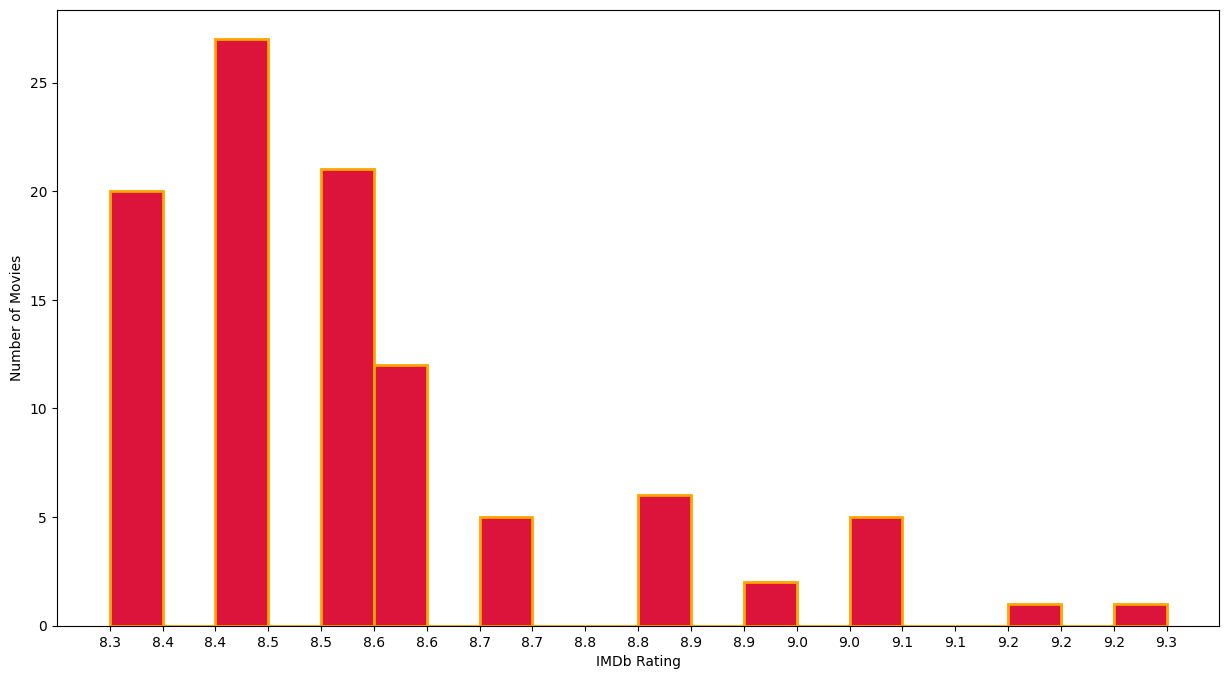

In [ ]:
# No of Movies per IMDB Rating.
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

fig,ax=plt.subplots()
fig.set_size_inches(15,8, forward=True)
N, bins, patches=ax.hist(dataset['imdb_ratings'],bins=20,histtype="bar",color="crimson",edgecolor="orange",linewidth=2)

ax.set_xlabel("IMDb Rating",fontsize=10)
ax.set_ylabel("Number of Movies",fontsize=10)
ax.set_xticks(bins)
ax.xaxis.set_major_formatter(tick.FormatStrFormatter('%0.1f'))

In [ ]:
# Top 10 Movies as per Metascore
top10_metascore = dataset.loc[dataset['metascore'].sort_values(ascending=False)[:10].index , ['movie_name','metascore']]
top10_metascore.reset_index(inplace = True)

In [ ]:
# Top 10 Movies as per IMDb Rating
top10_imdb_ratings = dataset.loc[dataset['imdb_ratings'].sort_values(ascending=False)[:10].index , ['movie_name','imdb_ratings']]
top10_imdb_ratings.reset_index(inplace = True)


In [ ]:
# Top 10 Movies as per votes by viewers
top10_number_votes = dataset.loc[dataset['number_votes'].sort_values(ascending=False)[:10].index , ['movie_name','number_votes']]
top10_number_votes.reset_index(inplace = True)

Text(0.5, 1.0, 'Top 10 Movies as per IMDb Rating')

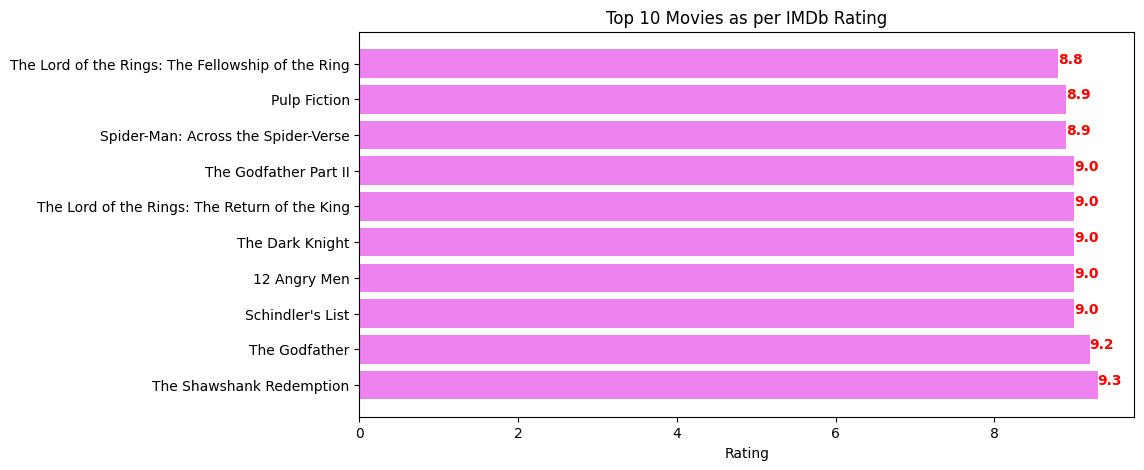

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.75

ax.barh(top10_imdb_ratings["movie_name"],top10_imdb_ratings["imdb_ratings"], color='violet')

for i, v in enumerate(top10_imdb_ratings["imdb_ratings"]):
    ax.text(v, i + .015, str(v),
            color = 'red', fontweight = 'bold')

ax.set_xlabel("Rating")
ax.set_title("Top 10 Movies as per IMDb Rating")


Text(0.5, 1.0, 'Top 10 Movies as per Metascore')

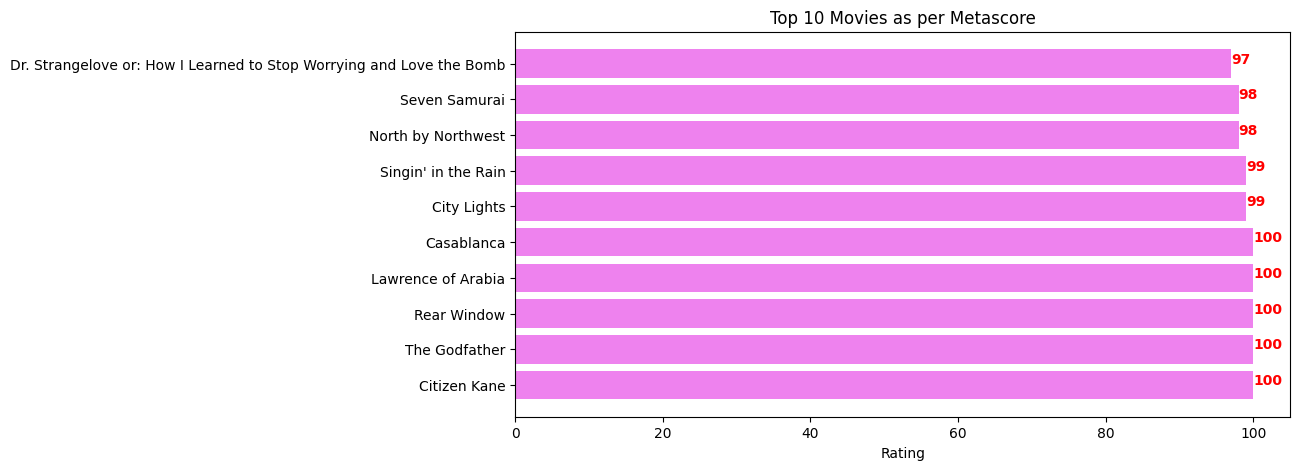

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.75

ax.barh(top10_metascore["movie_name"],top10_metascore["metascore"], color='violet')

for i, v in enumerate(top10_metascore["metascore"]):
    ax.text(v, i + .015, str(v),
            color = 'red', fontweight = 'bold')

ax.set_xlabel("Rating")
ax.set_title("Top 10 Movies as per Metascore")


Text(0.5, 1.0, 'Top 10 Movies as per No of Votes')

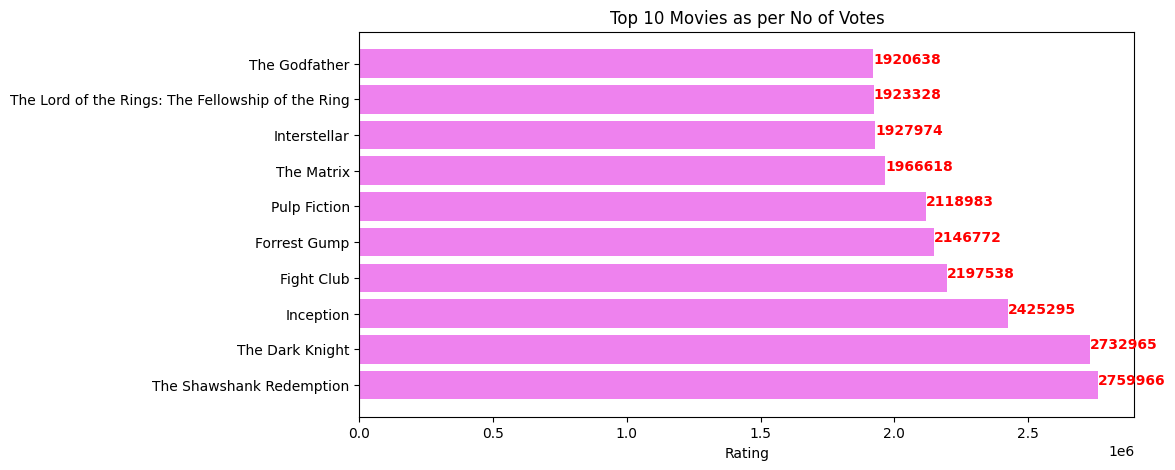

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.75

ax.barh(top10_number_votes["movie_name"],top10_number_votes["number_votes"], color='violet')

for i, v in enumerate(top10_number_votes["number_votes"]):
    ax.text(v, i + .015, str(v),
            color = 'red', fontweight = 'bold')

ax.set_xlabel("Rating")
ax.set_title("Top 10 Movies as per No of Votes")

<Axes: >

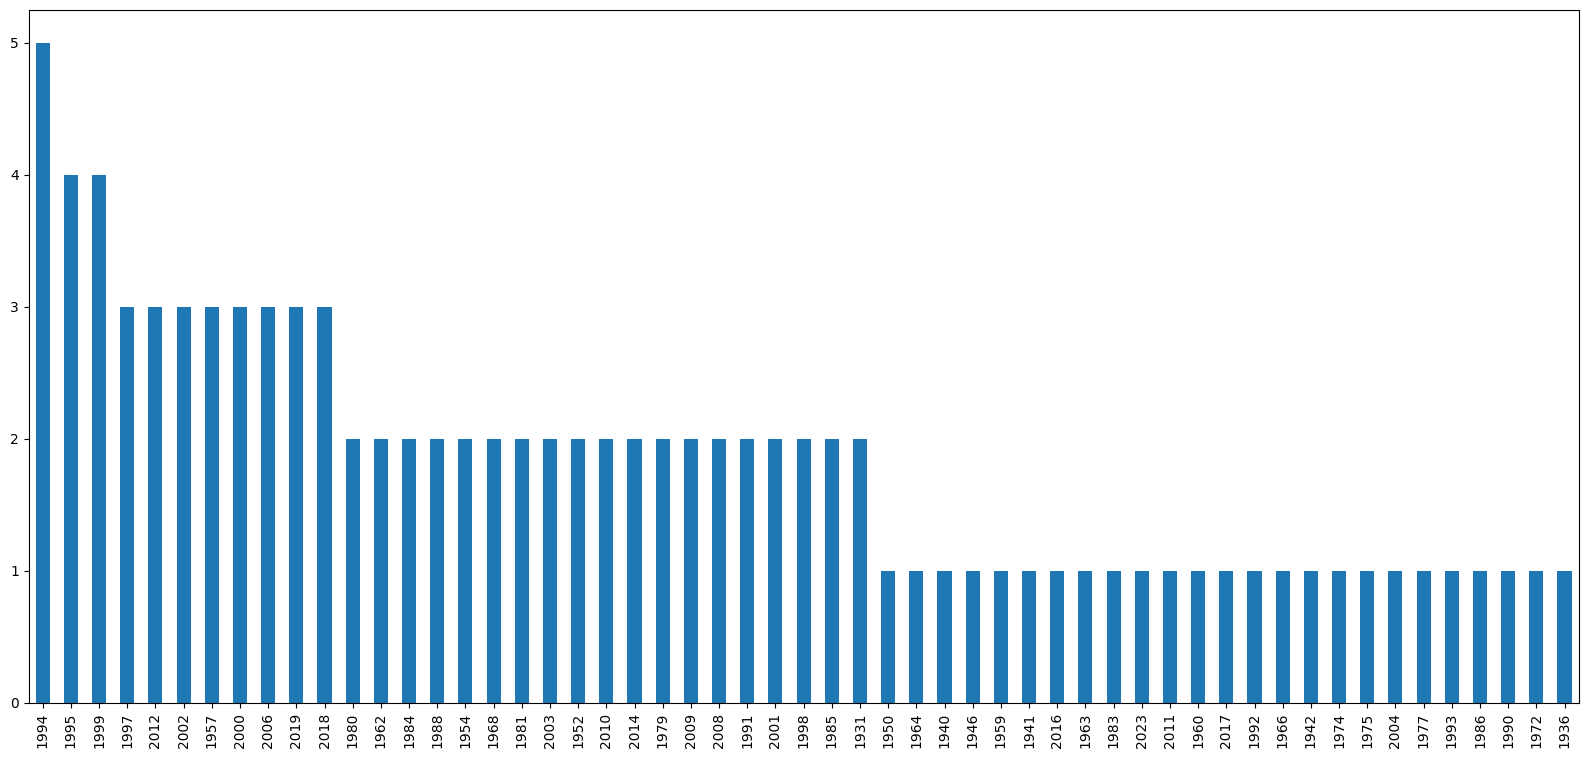

In [ ]:
# Number of Movies by Year

dataset['release_year'].value_counts().plot(kind='bar', figsize=[20,9])